In [56]:
import numpy as np
import swat
import pandas
import matplotlib.colors as colors
import seaborn as sns
from matplotlib import pyplot as plt

In [44]:
s = swat.CAS('localhost', 5570, 'sasdemo', 'Orion123')
fetch_opts = dict(maxrows=100000000, to=1000000)
sas_iris = pandas.DataFrame(s.table.fetch(table={"caslib":"open_source_integration", "name":"iris"}, **fetch_opts)["Fetch"])
df1 = sas_iris[["SepalLength", "SepalWidth",'Species']]

In [45]:
df1

,SepalLength,SepalWidth,Species
0,50.0,33.0,Setosa
1,46.0,34.0,Setosa
2,46.0,36.0,Setosa
3,51.0,33.0,Setosa
4,55.0,35.0,Setosa
...,...,...,...
145,64.0,27.0,Virginica
146,68.0,30.0,Virginica
147,57.0,25.0,Virginica
148,58.0,28.0,Virginica


In [32]:
def predict_NB_gaussian_class(X,mu_list,std_list,pi_list): 
    #Returns the class for which the Gaussian Naive Bayes objective function has greatest value
    scores_list = []
    classes = len(mu_list)
    
    for p in range(classes):
        score = (norm.pdf(x = X[0], loc = mu_list[p][0][0], scale = std_list[p][0][0] )  
                * norm.pdf(x = X[1], loc = mu_list[p][0][1], scale = std_list[p][0][1] ) 
                * pi_list[p])
        scores_list.append(score)
             
    return np.argmax(scores_list)

def predict_Bayes_class(X,mu_list,sigma_list): 
    #Returns the predicted class from an optimal bayes classifier - distributions must be known
    scores_list = []
    classes = len(mu_list)
    
    for p in range(classes):
        score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list[p], cov=sigma_list[p])
        scores_list.append(score)
             
    return np.argmax(scores_list)

/home/sasdemo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: No contour levels were found within the data range.


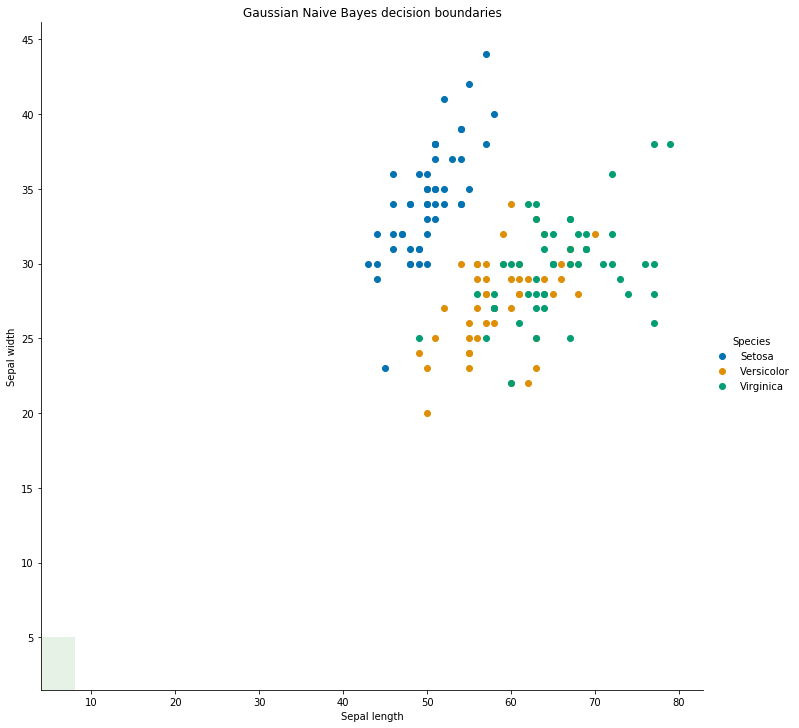

In [59]:
#Estimating the parameters
mu_list = np.split(df1.groupby('Species').mean().values,[1,2])
std_list = np.split(df1.groupby('Species').std().values,[1,2], axis = 0)
pi_list = df1.iloc[:,2].value_counts().values / len(df1)

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(df1, hue="Species", height=10, palette = 'colorblind') .map(plt.scatter, "SepalLength", "SepalWidth",)  .add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz = np.array(  [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1), mu_list, std_list, pi_list) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )


#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()

/home/sasdemo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: No contour levels were found within the data range.


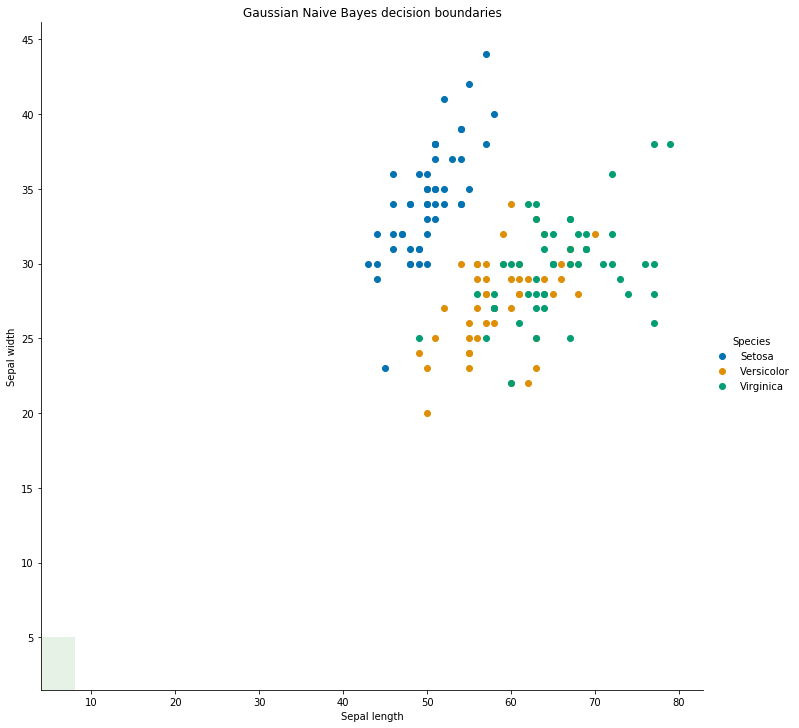

In [65]:
from sklearn.naive_bayes import GaussianNB

#Setup X and y data
X_data = df1.iloc[:,0:1]
y_labels = df1.iloc[:,2].replace({'Setosa':0,'Versicolor':1,'Virginica':2}).copy()

#Fit model
model_sk = GaussianNB(priors = None)
model_sk.fit(X_data,y_labels)


# Our 2-dimensional classifier will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(sas_iris, hue="Species", height=10, palette = 'colorblind') .map(plt.scatter, "SepalLength", "SepalWidth",)  .add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz = np.array(  [model_sk.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )


#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()